In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            font-family:Times New Roman;;
            letter-spacing:0.5px">

<span style="font-family:'Times New Roman'; font-weight: 1000;" >&#9872; DESCRIPTION OF A PROJECT </span>

Данные взяты с сайта Datahub.io

Link - https://datahub.io/core/population-city

License - Open Data Commons Public Domain Dedication and License v1.0

Source - UNData: UNSD Demographic Statistics

***Please note: This dataset is intended only as an exercise for employing clustering algorithms. It provides no practical insights, particularly when comparing data from different years.***

In [3]:
df = pd.read_csv('flat-ui__data-Sun Feb 09 2025.csv')
df

,Country or Area,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2011,Total,Both Sexes,Durrës,City proper,Census - de jure - complete tabulation,"Final figure, complete",2013.0,113249.0,NaN
1,Albania,2011,Total,Both Sexes,TIRANA,City proper,Census - de jure - complete tabulation,"Final figure, complete",2013.0,418495.0,NaN
2,Albania,2003,Total,Both Sexes,TIRANA,City proper,Estimate - de facto,"Final figure, complete",2004.0,392863.0,NaN
3,Algeria,2008,Total,Both Sexes,Adrar,City proper,Census - de jure - complete tabulation,"Final figure, complete",2016.0,200834.0,NaN
4,Algeria,2008,Total,Both Sexes,Ain Defla,City proper,Census - de jure - complete tabulation,"Final figure, complete",2016.0,450280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29969,Åland Islands,2010,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2011.0,11156.5,1
29970,Åland Islands,2009,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2009.0,11064.0,1
29971,Åland Islands,2008,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2009.0,10954.0,1
29972,Åland Islands,2007,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2007.0,10863.0,1


In [4]:
df.columns

Index(['Country or Area', 'Year', 'Area', 'Sex', 'City', 'City type',
       'Record Type', 'Reliability', 'Source Year', 'Value',
       'Value Footnotes'],
      dtype='object')

In [5]:
df = df.drop(columns = ['Record Type', 'Reliability', 'Area', 'Sex', 'Source Year', 'Value Footnotes'])

In [6]:
df

,Country or Area,Year,City,City type,Value
0,Albania,2011,Durrës,City proper,113249.0
1,Albania,2011,TIRANA,City proper,418495.0
2,Albania,2003,TIRANA,City proper,392863.0
3,Algeria,2008,Adrar,City proper,200834.0
4,Algeria,2008,Ain Defla,City proper,450280.0
...,...,...,...,...,...
29969,Åland Islands,2010,MARIEHAMN,City proper,11156.5
29970,Åland Islands,2009,MARIEHAMN,City proper,11064.0
29971,Åland Islands,2008,MARIEHAMN,City proper,10954.0
29972,Åland Islands,2007,MARIEHAMN,City proper,10863.0


<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

Duplicate rows are also present in the dataset. We will drop them.

In [8]:
df = df.drop_duplicates()

In [9]:
#Look on the number of rows

df.shape

(29918, 5)

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

The table presents data on both the population of the city proper and the population of urban agglomerations. To facilitate training exercises, we will retain only the “city proper” designation.

In [11]:
df = df[df['City type'] == 'City proper'].copy()

In [12]:
df

,Country or Area,Year,City,City type,Value
0,Albania,2011,Durrës,City proper,113249.0
1,Albania,2011,TIRANA,City proper,418495.0
2,Albania,2003,TIRANA,City proper,392863.0
3,Algeria,2008,Adrar,City proper,200834.0
4,Algeria,2008,Ain Defla,City proper,450280.0
...,...,...,...,...,...
29969,Åland Islands,2010,MARIEHAMN,City proper,11156.5
29970,Åland Islands,2009,MARIEHAMN,City proper,11064.0
29971,Åland Islands,2008,MARIEHAMN,City proper,10954.0
29972,Åland Islands,2007,MARIEHAMN,City proper,10863.0


In [13]:
max_values = df.groupby('City')['Year'].max().reset_index()

In [14]:
max_values

,City,Year
0,6th of October City,2006
1,A Coruña,2021
2,ABUJA,1991
3,ACCRA,2010
4,ADAMSTOWN,2013
...,...,...
4791,Çorum (Merkez),2021
4792,Ñemby,2022
4793,Ñuñoa,2024
4794,Ústí nad Labem,2021


In [15]:
merged_df = pd.merge(df, max_values, on=['City', 'Year'], how='inner')
merged_df

,Country or Area,Year,City,City type,Value
0,Albania,2011,Durrës,City proper,113249.0
1,Albania,2011,TIRANA,City proper,418495.0
2,Algeria,2008,Adrar,City proper,200834.0
3,Algeria,2008,Ain Defla,City proper,450280.0
4,Algeria,2008,Ain Temouchent,City proper,299341.0
...,...,...,...,...,...
4840,Zimbabwe,2022,Kadoma,City proper,117381.0
4841,Zimbabwe,2022,Kwekwe,City proper,119863.0
4842,Zimbabwe,2022,Masvingo,City proper,90286.0
4843,Zimbabwe,2022,Mutare,City proper,224804.0


In [16]:
def get_max_year_cities(df):
    
    """
    Keeps only the records for each city in the DataFrame
    where Year is the maximum.

    Args:
      df: pandas DataFrame with the data .

    Returns:
      pandas DataFrame containing only the records with the maximum years for each city.
    """

    # Group by cities and find the maximum value of "Year" for each city
    max_years = df.groupby('City')['Year'].max().reset_index()

    # Merge with the original DataFrame to get the rows corresponding to the maximum years
    merged_df = pd.merge(df, max_years, on=['City', 'Year'], how='inner')

    # To ensure that if there are multiple years with the same maximum Year, the maximum Value from those is taken
    max_values = merged_df.groupby('City')['Value'].max().reset_index()

    final_df = pd.merge(merged_df, max_values, on=['City', 'Value'], how='inner')

    return final_df

In [17]:
#use the function

df = get_max_year_cities(df.copy())

In [18]:
df

,Country or Area,Year,City,City type,Value
0,Albania,2011,Durrës,City proper,113249.0
1,Albania,2011,TIRANA,City proper,418495.0
2,Algeria,2008,Adrar,City proper,200834.0
3,Algeria,2008,Ain Defla,City proper,450280.0
4,Algeria,2008,Ain Temouchent,City proper,299341.0
...,...,...,...,...,...
4791,Zimbabwe,2022,Kadoma,City proper,117381.0
4792,Zimbabwe,2022,Kwekwe,City proper,119863.0
4793,Zimbabwe,2022,Masvingo,City proper,90286.0
4794,Zimbabwe,2022,Mutare,City proper,224804.0


In [19]:
df['City'].value_counts().shape

(4796,)

In [20]:
#choose features for clusterisation

cities = df.iloc[:, [2,4]].reset_index()
X = cities.iloc[:, [0,2]].values

In [21]:
X

array([[0.00000e+00, 1.13249e+05],
       [1.00000e+00, 4.18495e+05],
       [2.00000e+00, 2.00834e+05],
       ...,
       [4.79300e+03, 9.02860e+04],
       [4.79400e+03, 2.24804e+05],
       [4.79500e+03, 1.17850e+04]])

<div style="
  background-color: #a7c2e1; 
  border-bottom: 5px solid #000080; 
  padding: 20px; 
  text-align: center; 
  font-family: 'Georgia', serif; 
">
  <h1 style="font-size: 26px; font-weight: bold;">
   KMEANS
  </h1>
</div>

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

We employed the K-Means algorithm, a popular centroid-based clustering method, to partition our data into k distinct clusters based on minimizing the within-cluster sum of squares.

K-Means aims to identify k centroids within the dataset, where each data point is assigned to the nearest centroid, resulting in clusters of relatively similar characteristics.

In [23]:
#import 
from sklearn.cluster import KMeans

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

“We implement the Elbow Method to determine the optimal number of clusters for K-Means clustering. It calculates the Within-Cluster Sum of Squares (WCSS) for cluster numbers ranging from 1 to 10, plots the WCSS values against the number of clusters, and displays the resulting ‘elbow’ plot to visually identify the point of diminishing returns, suggesting the ideal number of clusters.”

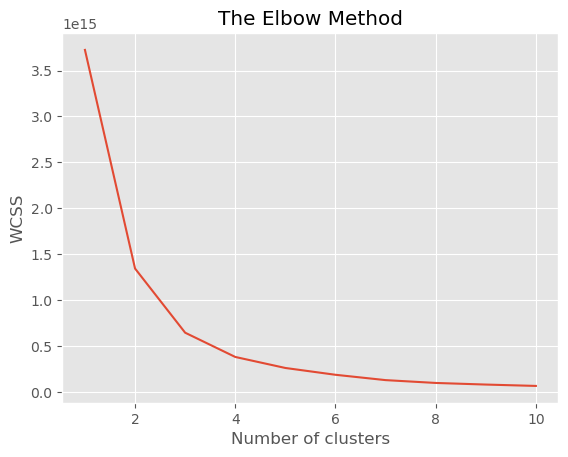

In [25]:
# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters.
wcss = []

# Iterate through a range of potential cluster numbers (from 1 to 10).
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# After calculating WCSS for different numbers of clusters, plot the results to visualize the Elbow Method.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

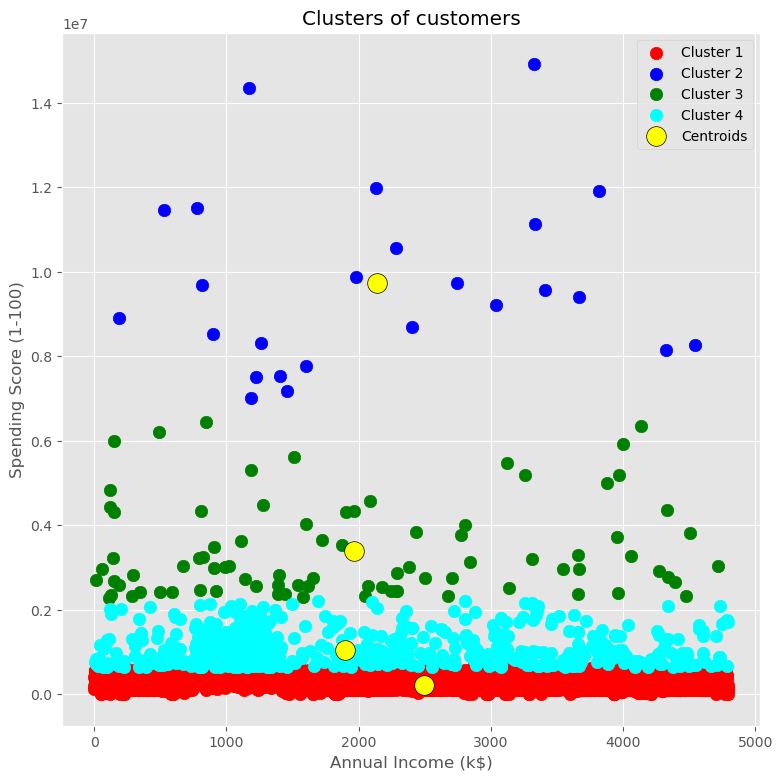

In [106]:
plt.figure(figsize = (9,9))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', edgecolors='black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<div style="
  background-color: #a7c2e1; 
  border-bottom: 5px solid #000080; 
  padding: 20px; 
  text-align: center; 
  font-family: 'Georgia', serif; 
">
  <h1 style="font-size: 26px; font-weight: bold;">
   Hierarchy Clusterisation
  </h1>
</div>

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

Hierarchical clustering is a method that builds a hierarchy of clusters by successively merging the closest clusters based on a distance metric.

It’s a clustering algorithm that creates a tree-like structure (dendrogram) representing nested clusters, allowing exploration of data relationships at different levels of granularity.

In [30]:
#import

import scipy.cluster.hierarchy as sch

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

We will now construct a dendrogram to visually represent the hierarchical clustering of our data. This will allow us to explore the relationships between data points and determine the optimal number of clusters. The code below first performs the hierarchical clustering using the ‘ward’ linkage method and then generates the dendrogram based on the clustering results

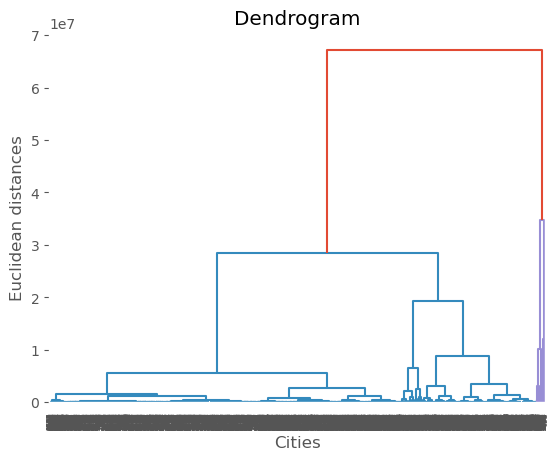

In [32]:

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cities')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

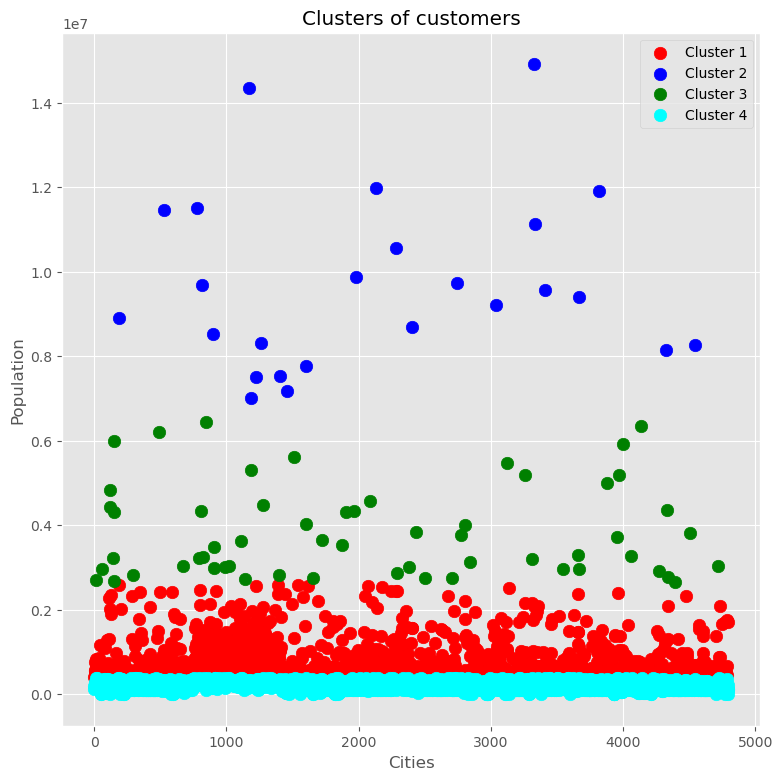

In [108]:
plt.figure(figsize = (9,9))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 80, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Cities')
plt.ylabel('Population')
plt.legend()
plt.show()

<div style="
  background-color: #a7c2e1; 
  border-bottom: 5px solid #000080; 
  padding: 20px; 
  text-align: center; 
  font-family: 'Georgia', serif; 
">
  <h1 style="font-size: 26px; font-weight: bold;">
   RESULTS
  </h1>
</div>

In [36]:
#add the resulting cluster assignments to the table.

df['h_clust'] = y_hc
df['k_clust'] = y_kmeans

In [37]:
df

,Country or Area,Year,City,City type,Value,h_clust,k_clust
0,Albania,2011,Durrës,City proper,113249.0,3,0
1,Albania,2011,TIRANA,City proper,418495.0,0,0
2,Algeria,2008,Adrar,City proper,200834.0,3,0
3,Algeria,2008,Ain Defla,City proper,450280.0,0,0
4,Algeria,2008,Ain Temouchent,City proper,299341.0,3,0
...,...,...,...,...,...,...,...
4791,Zimbabwe,2022,Kadoma,City proper,117381.0,3,0
4792,Zimbabwe,2022,Kwekwe,City proper,119863.0,3,0
4793,Zimbabwe,2022,Masvingo,City proper,90286.0,3,0
4794,Zimbabwe,2022,Mutare,City proper,224804.0,3,0


In [38]:
#Look on the population by clusters

# - 'mean':  Mean of 'Value' for each cluster
# - 'min':   Minimum of 'Value' for each cluster
# - 'max':   Maximum of 'Value' for each cluster

population_stats_by_k_cluster = df.groupby('k_clust')['Value'].agg(['mean', 'min', 'max', 'count'])

population_stats_by_k_cluster

,mean,min,max,count
k_clust,,,,
0,2.266125e+05,49.0,641583.0,4006
1,9.724862e+06,7008831.0,14910352.0,25
2,3.395615e+06,2274560.0,6445777.0,85
3,1.058458e+06,642907.0,2206488.0,680


In [39]:
population_stats_by_h_cluster = df.groupby('h_clust')['Value'].agg(['mean', 'min', 'max', 'count'])

population_stats_by_h_cluster

,mean,min,max,count
h_clust,,,,
0,8.311507e+05,394202.0,2591681.0,1309
1,9.724862e+06,7008831.0,14910352.0,25
2,3.844118e+06,2664452.0,6445777.0,58
3,1.778065e+05,49.0,393805.0,3404


In [79]:
max_values_k = population_stats_by_k_cluster['max']
max_values_h = population_stats_by_h_cluster['max']

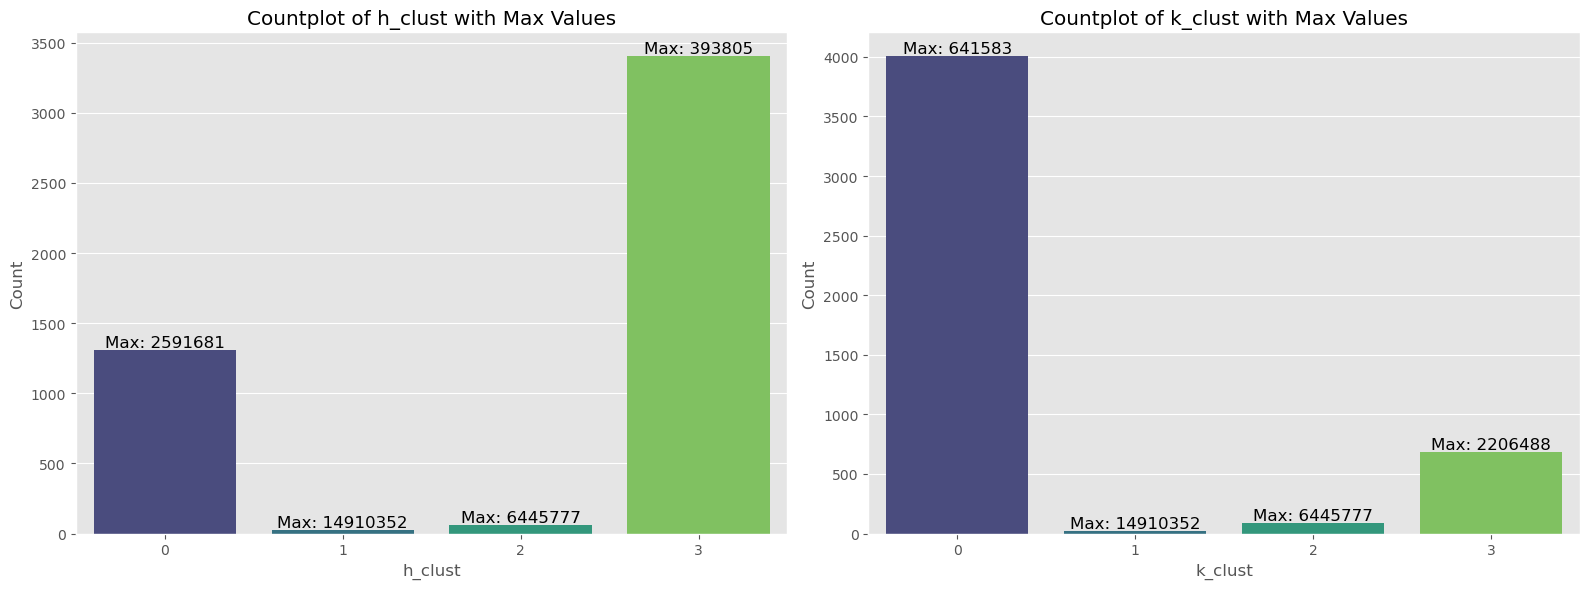

In [87]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
sns.countplot(x='h_clust', data=df, ax=ax1, palette='viridis')
ax1.set_title('Countplot of h_clust with Max Values')
ax1.set_xlabel('h_clust')
ax1.set_ylabel('Count')

for p in ax1.patches:
    height = p.get_height()
    cluster_value = int(p.get_x() + p.get_width()/2)  # get h_clust value
    max_val = max_values_h.get(cluster_value, 0)  # Get the max value from the precalculated result
    ax1.annotate(f'Max: {max_val:.0f}', (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=12, color='black')

ax2 = axes[1]
sns.countplot(x='k_clust', data=df, ax=ax2, palette='viridis')
ax2.set_title('Countplot of k_clust with Max Values')
ax2.set_xlabel('k_clust')
ax2.set_ylabel('Count')

for p in ax2.patches:
    height = p.get_height()
    cluster_value = int(p.get_x() + p.get_width()/2)  # get k_clust value
    max_val = max_values_k.get(cluster_value, 0)  # Get the max value from the precalculated result
    ax2.annotate(f'Max: {max_val:.0f}', (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#d3e7f5;
            font-family:Georgia;;
            letter-spacing:0.5px">

Let's look at examples of clustering. Let's take clusters of the largest cities in terms of population for this

In [41]:
df[df['k_clust'] == 1].head(15)

,Country or Area,Year,City,City type,Value,h_clust,k_clust
188,Bangladesh,2011,DHAKA,City proper,8906035.0,1,1
528,Brazil,2022,São Paulo,City proper,11451999.0,1,1
778,China,2000,BEIJING (PEKING),City proper,11509595.0,1,1
814,China,2000,Chongqing,City proper,9691901.0,1,1
899,China,2000,Guangzhou,City proper,8524826.0,1,1
1175,China,2000,Shanghai,City proper,14348535.0,1,1
1189,China,2000,Shenzhen,City proper,7008831.0,1,1
1228,China,2000,Tianjin,City proper,7499181.0,1,1
1265,China,2000,Wuhan,City proper,8312700.0,1,1
1408,"China, Hong Kong SAR",2023,HONG KONG SAR,City proper,7536100.0,1,1


In [42]:
df[df['h_clust'] == 1].head(15)

,Country or Area,Year,City,City type,Value,h_clust,k_clust
188,Bangladesh,2011,DHAKA,City proper,8906035.0,1,1
528,Brazil,2022,São Paulo,City proper,11451999.0,1,1
778,China,2000,BEIJING (PEKING),City proper,11509595.0,1,1
814,China,2000,Chongqing,City proper,9691901.0,1,1
899,China,2000,Guangzhou,City proper,8524826.0,1,1
1175,China,2000,Shanghai,City proper,14348535.0,1,1
1189,China,2000,Shenzhen,City proper,7008831.0,1,1
1228,China,2000,Tianjin,City proper,7499181.0,1,1
1265,China,2000,Wuhan,City proper,8312700.0,1,1
1408,"China, Hong Kong SAR",2023,HONG KONG SAR,City proper,7536100.0,1,1


<div class="alert alert-block alert-info" style="
            border-radius:1px;
            border: 1px solid #1C6EA4;
            background-color:#f0deaf;
            font-family:Times New Roman;;
            letter-spacing:0.5px">

<span style="font-family:'Times New Roman'; font-weight: 1000;" >&#9872; SUMMARY </span>

* We compared two clustering models;
* It was decided to divide the available data into four clusters based on the elbow and dendrogram method so that they could be compared directly;
* Hierarchical clustering used a larger number of values for a cluster of average populations;
* Otherwise, the data turned out to be divided approximately equally;
* Probably, at low values, as well as in the presence of other parameters, the division into clusters would be more indicative;
* It's just clustering training. It is no longer meaningful to compare data for at least some non-matching time periods.